## Nombre: Andrés Jiménez

# Ejercicio 3: Representación Gráfica de Vectores de Documentos y Consultas

## Objetivo de la práctica
- Comprender la representación de documentos y consultas en el modelo de espacio vectorial, mediante el cálculo de matrices término-documento usando medidas como TF y TF-IDF.
- Aplicar la similitud coseno para comparar documentos con consultas, y utilizarla para recuperar y ordenar documentos según su relevancia.
- Visualizar de forma intuitiva los vectores de documentos y consultas, mediante reducción de dimensionalidad y representación gráfica en el plano, para facilitar la interpretación geométrica de la recuperación de información.

## Parte 1: Construcción de la matriz término-documento y TF-IDF

### Actividad
1. Usa el siguiente corpus de 4 documentos.
2. Vectoriza los documentos usando:
   - Frecuencia absoluta (TF)
   - TF-IDF
3. Visualiza los documentos como un gráfico de dispersión 2D y 3D.

In [5]:
import pandas as pd

In [6]:
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]

print(documents)

['El gato se escondió debajo de la cama.', 'La cama estaba limpia y cómoda.', 'El perro y el gato jugaron en el jardín.', 'La limpieza del jardín es importante.']


In [7]:
documents[0].lower().strip('.')

'el gato se escondió debajo de la cama'

In [8]:
vocab = set()
for doc in documents:
    for word in doc.lower().strip('.').split(sep=" "):
        vocab.add(word)
print(vocab)

{'cama', 'es', 'la', 'estaba', 'del', 'cómoda', 'y', 'de', 'en', 'limpia', 'jugaron', 'escondió', 'importante', 'debajo', 'gato', 'el', 'se', 'limpieza', 'jardín', 'perro'}


In [9]:
dict_tf = {}
i=0
for doc in documents:
    dict_tfd = {}
    for term in vocab:
        count = doc.lower().strip('.').count(term)
        dict_tfd[term] = count
    dict_tf[i] = dict_tfd
    i += 1
print(dict_tfd)

{'cama': 0, 'es': 1, 'la': 1, 'estaba': 0, 'del': 1, 'cómoda': 0, 'y': 0, 'de': 1, 'en': 0, 'limpia': 0, 'jugaron': 0, 'escondió': 0, 'importante': 1, 'debajo': 0, 'gato': 0, 'el': 1, 'se': 0, 'limpieza': 1, 'jardín': 1, 'perro': 0}


In [10]:
matriz = pd.DataFrame(dict_tf)
matriz

,0,1,2,3
cama,1,1,0,0
es,1,1,0,1
la,1,1,0,1
estaba,0,1,0,0
del,0,0,0,1
cómoda,0,1,0,0
y,0,1,1,0
de,2,0,0,1
en,0,0,1,0
limpia,0,1,0,0


In [11]:
matriz[0]['del']

0

In [12]:
matriz.to_csv("Matriz_td.csv", index = True)

In [13]:
import pandas as pd
import math

def calcular_matriz_tf_idf(matriz_T):
    # Convertimos la matriz_T en un diccionario de términos y frecuencias
    dict_tf = matriz_T.T.to_dict()

    # Extraemos términos y documentos
    terminos = sorted(dict_tf.keys())
    num_docs = len(matriz_T.columns)

    # Paso 1: Calcular DF (en cuántos documentos aparece cada término)
    df_por_termino = {}
    for termino in terminos:
        df_por_termino[termino] = sum(1 for freq in dict_tf[termino].values() if freq > 0)

    # Paso 2: Calcular TF-IDF
    matriz_tf_idf = []
    for termino in terminos:
        fila = []
        idf = math.log(num_docs / (1 + df_por_termino[termino]))

        for doc in matriz_T.columns:
            f_td = dict_tf[termino].get(doc, 0)
            if f_td > 0:
                tf = 1 + math.log(f_td)
                w = tf * idf
            else:
                w = 0.0
            fila.append(w)
        
        matriz_tf_idf.append(fila)

    # Convertimos la matriz en un DataFrame
    df_tf_idf = pd.DataFrame(matriz_tf_idf, index=terminos, columns=matriz_T.columns)
    
    return df_tf_idf


In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import pandas as pd

# Vectorización de frecuencia de términos (TF)
vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(documents)

# Aplicar transformación TF-IDF
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

# Convertir a DataFrame
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
df_tfidf


,cama,cómoda,de,debajo,del,el,en,es,escondió,estaba,gato,importante,jardín,jugaron,la,limpia,limpieza,perro,se
0,0.314806,0.000000,0.399292,0.399292,0.000000,0.314806,0.000000,0.000000,0.399292,0.000000,0.314806,0.000000,0.000000,0.000000,0.254863,0.000000,0.000000,0.000000,0.399292
1,0.392784,0.498197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.498197,0.000000,0.000000,0.000000,0.000000,0.317993,0.498197,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.754104,0.318829,0.000000,0.000000,0.000000,0.251368,0.000000,0.251368,0.318829,0.000000,0.000000,0.000000,0.318829,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.445922,0.000000,0.000000,0.445922,0.000000,0.000000,0.000000,0.445922,0.351570,0.000000,0.284626,0.000000,0.445922,0.000000,0.000000


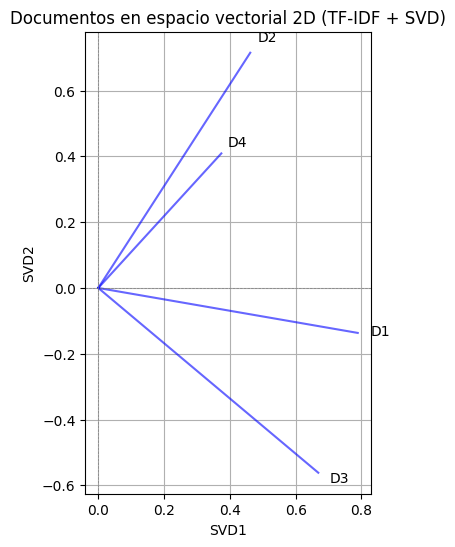

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Reducción de dimensiones con Truncated SVD (funciona bien con matrices dispersas)
pca = TruncatedSVD(n_components=2)
docs_2d = pca.fit_transform(X_tfidf.toarray())  # No se necesita .toarray()

# Visualización en 2D
plt.figure(figsize=(10, 6))
for i, (x, y) in enumerate(docs_2d):
    plt.plot([0, x], [0, y], color='blue', alpha=0.6)  # Línea en lugar de flecha
    plt.text(x * 1.05, y * 1.05, f'D{i+1}', fontsize=10)

plt.title("Documentos en espacio vectorial 2D (TF-IDF + SVD)")
plt.xlabel("SVD1")
plt.ylabel("SVD2")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


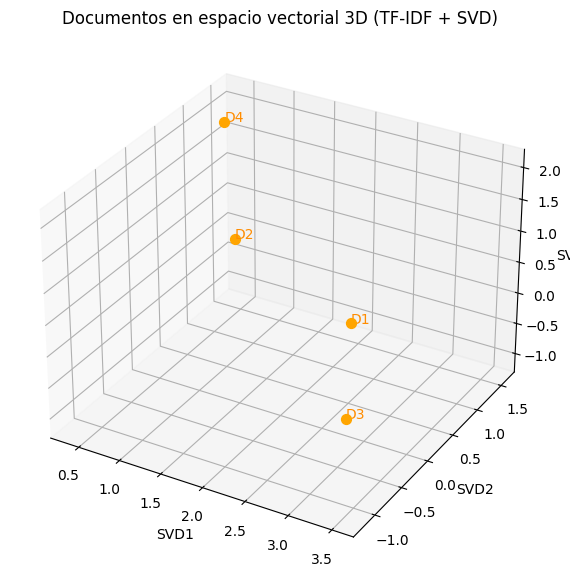

In [18]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Reducción de dimensiones con Truncated SVD a 3D
pca_3d = TruncatedSVD(n_components=3)
docs_3d = pca_3d.fit_transform(X_counts)

# Visualización en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(docs_3d)):
    ax.scatter(docs_3d[i, 0], docs_3d[i, 1], docs_3d[i, 2], c='orange', s=50)
    ax.text(docs_3d[i, 0], docs_3d[i, 1], docs_3d[i, 2], f'D{i+1}', color='darkorange')

ax.set_title("Documentos en espacio vectorial 3D (TF-IDF + SVD)")
ax.set_xlabel("SVD1")
ax.set_ylabel("SVD2")
ax.set_zlabel("SVD3")
plt.show()


In [ ]:
plt.figu

## Parte 2: Representación de la consulta como vector

### Actividad
1. Ingresa una consulta como texto.
2. Representa la consulta en el mismo espacio vectorial que los documentos.
3. Calcula similitud coseno entre la consulta y cada documento.
4. Visualiza la consulta como un vector en el mismo espacio vectorial que los documentos.

Ingresa tu consulta:  perro



Similitud coseno entre la consulta y los documentos:
Documento 1: 0.0000
Documento 2: 0.0000
Documento 3: 0.2576
Documento 4: 0.0000


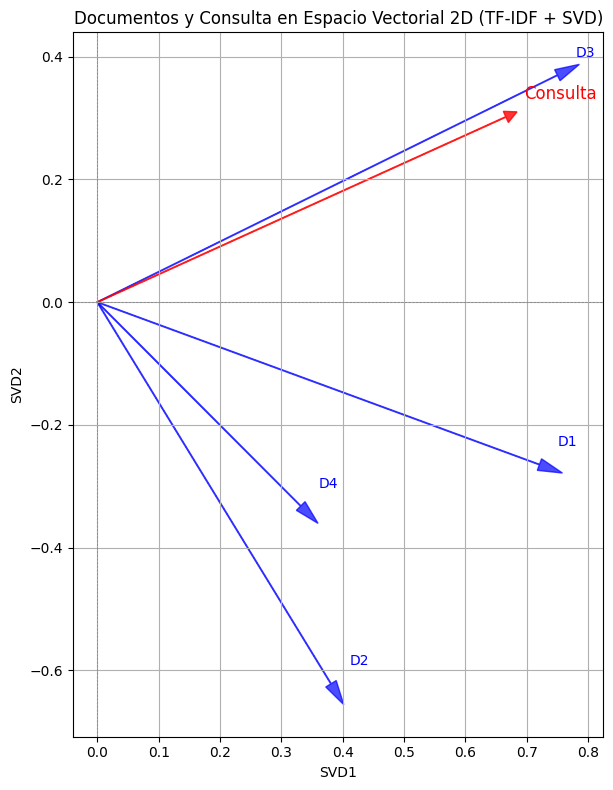

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

# 1. Documentos base
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]

# 2. Ingresar consulta por teclado
consulta = input("Ingresa tu consulta: ")

# 3. Vectorización TF-IDF (incluyendo la consulta)
all_texts = documents + [consulta]
vectorizer = TfidfVectorizer()
X_all = vectorizer.fit_transform(all_texts)

# Separar documentos y consulta
X_tfidf = X_all[:-1]
X_query = X_all[-1]

# 4. Calcular similitud coseno
similitudes = cosine_similarity(X_query, X_tfidf)[0]
print("\nSimilitud coseno entre la consulta y los documentos:")
for i, sim in enumerate(similitudes):
    print(f"Documento {i+1}: {sim:.4f}")

# 5. Reducción a 2 dimensiones con TruncatedSVD
svd = TruncatedSVD(n_components=2)
docs_2d = svd.fit_transform(X_all)
docs_coords = docs_2d[:-1]
query_coord = docs_2d[-1]

# 6. Visualización en 2D con flechas
plt.figure(figsize=(12, 8))

# Documentos
for i, (x, y) in enumerate(docs_coords):
    plt.arrow(0, 0, x, y, head_width=0.02, head_length=0.04, fc='blue', ec='blue', alpha=0.7)
    plt.text(x + 0.03, y + 0.03, f'D{i+1}', fontsize=10, color='blue')

# Consulta
qx, qy = query_2d
plt.arrow(0, 0, qx, qy, head_width=0.02, head_length=0.02, color='red', alpha=0.8)
plt.text(qx + 0.03, qy + 0.03, 'Consulta', fontsize=12, color='red')
# Ejes y estilo
plt.title("Documentos y Consulta en Espacio Vectorial 2D (TF-IDF + SVD)")
plt.xlabel("SVD1")
plt.ylabel("SVD2")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')


plt.tight_layout()
plt.show()


## Parte 3: Consulta por similitud y ranking de documentos

### Actividad
1. Con la misma representación de vectores, implementar una función que devuelva los documentos más relevantes a una consulta usando similitud coseno.
2. Dibuja los vectores (de documentos y de consulta) como flechas desde el origen usando `plt.quiver()` o `plt.arrow()`

Ingresa tu consulta:  perro



Ranking de documentos por similitud:
Documento 3: Similitud = 0.2576 → "El perro y el gato jugaron en el jardín."
Documento 1: Similitud = 0.0000 → "El gato se escondió debajo de la cama."
Documento 2: Similitud = 0.0000 → "La cama estaba limpia y cómoda."
Documento 4: Similitud = 0.0000 → "La limpieza del jardín es importante."


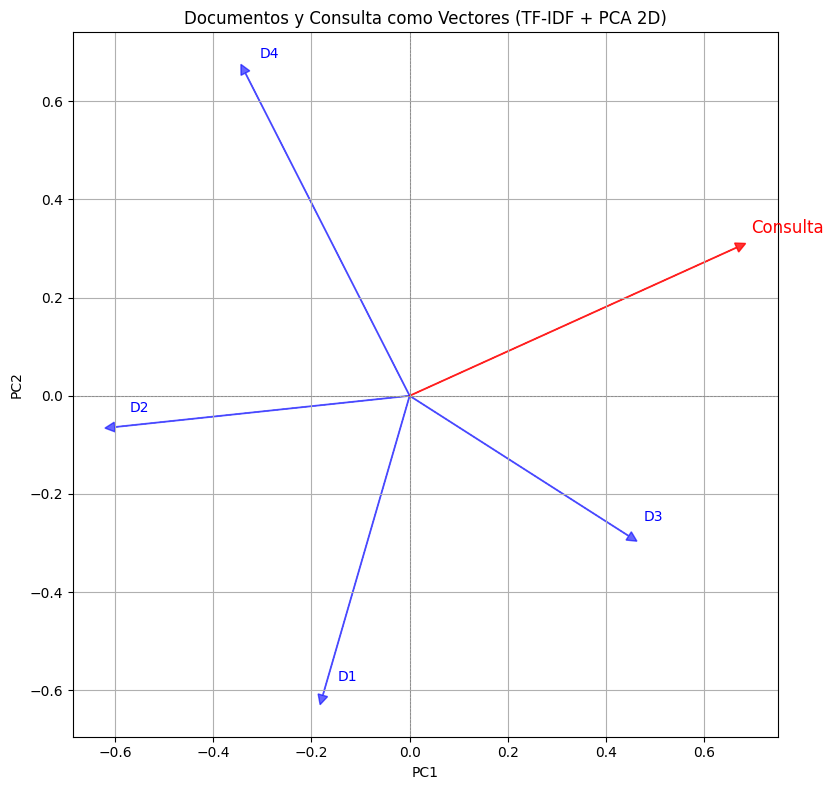

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Documentos base
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]

# Consulta ingresada por teclado
consulta = input("Ingresa tu consulta: ")

# Vectorización TF-IDF
all_texts = documents + [consulta]
vectorizer = TfidfVectorizer()
X_all = vectorizer.fit_transform(all_texts)

# Separar documentos y consulta
X_docs = X_all[:-1]
X_query = X_all[-1]

# Función para ranking de documentos por similitud coseno
def rank_documents(query_vector, doc_vectors, docs):
    similitudes = cosine_similarity(query_vector, doc_vectors)[0]
    ranking = sorted(enumerate(similitudes), key=lambda x: x[1], reverse=True)
    print("\nRanking de documentos por similitud:")
    for idx, score in ranking:
        print(f"Documento {idx+1}: Similitud = {score:.4f} → \"{docs[idx]}\"")
    return ranking

# Ejecutar ranking
ranking = rank_documents(X_query, X_docs, documents)

# Reducción a 2D para visualización
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_all.toarray())
docs_2d = X_2d[:-1]
query_2d = X_2d[-1]

# Visualización con flechas desde el origen
plt.figure(figsize=(12, 8))

# Documentos
for i, (x, y) in enumerate(docs_2d):
    plt.arrow(0, 0, x, y, head_width=0.02, head_length=0.02, color='blue', alpha=0.6)
    plt.text(x + 0.03, y + 0.03, f'D{i+1}', fontsize=10, color='blue')

# Consulta
qx, qy = query_2d
plt.arrow(0, 0, qx, qy, head_width=0.02, head_length=0.02, color='red', alpha=0.8)
plt.text(qx + 0.03, qy + 0.03, 'Consulta', fontsize=12, color='red')


plt.title("Documentos y Consulta como Vectores (TF-IDF + PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()
